# Finance Data Project 

In this data project, I will conduct exploratory data analysis of stock prices. 

Bank stocks will be my main focus. In this analysis, we will see how they progressed throughout the financial crisis all the way to early 2016.

## Imports


In [134]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
#set a higher resolution of the figures
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

## Data

Stock information for the following banks from Jan 1st 2006 to Jan 1st 2016 will be obtained:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [136]:
srt = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)
BAC = data.get_data_yahoo('BAC',srt,end)
C = data.get_data_yahoo('C',srt,end)
C.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,440.882477
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870900.0,432.742950
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143100.0,434.889679
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370200.0,434.889679
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680700.0,432.832489


In [137]:
JPM = data.get_data_yahoo('JPM',srt,end)
JPM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,27.529718
2006-01-04,40.139999,39.419998,39.779999,39.619999,13491500.0,27.370821
2006-01-05,39.810001,39.500000,39.610001,39.740002,8109400.0,27.453718
2006-01-06,40.240002,39.549999,39.919998,40.020000,7966900.0,27.647156
2006-01-09,40.720001,39.880001,39.880001,40.669998,16575200.0,28.096193


In [138]:
MS = data.get_data_yahoo('MS',srt,end)
MS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,37.429329
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,37.455013
2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,37.557716
2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,37.596241
2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,37.994202


In [139]:
WFC = data.get_data_yahoo('WFC',srt,end)
WFC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,31.975000,31.195000,31.600000,31.900000,11016400.0,20.408512
2006-01-04,31.820000,31.365000,31.799999,31.530001,10870000.0,20.171795
2006-01-05,31.555000,31.309999,31.500000,31.495001,10158000.0,20.149401
2006-01-06,31.775000,31.385000,31.580000,31.680000,8403800.0,20.267757
2006-01-09,31.825001,31.555000,31.674999,31.674999,5619600.0,20.264565


In [140]:
GS = data.get_data_yahoo('GS',srt,end)
GS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,107.575417
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,106.089539
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,106.047821
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,107.550362
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,108.844261


**Create a list of the ticker symbols (as strings) in alphabetical order.**

In [141]:
tickers = ["BAC","C","GS","JPM","MS","WFC"]

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.**

In [142]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)

**Set the column name levels:**

In [143]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Check the head of the bank_stocks dataframe.**

In [144]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      \
Stock Info   Adj Close        High         Low        Open       Close   
Date                                                                     
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994   

Bank Ticker    ...             MS                                         WFC  \
Stock Info     ...           Open      Close     Volume  Adj Close       High   
Date           ...                                                              
2006-01-03     ...      57.169998  58.310001  5377000.0  37.429329  31.975000   
2006-01-04     ...      58.700001  58.349998  7977800.0  37.455013  31.820000   
2006-01-05     ...      58.549999  58.509998  5778000.0  37.557716  31.555000   
2006-01-06     ...      58.770000  58.570000  6889800.0  37.596241  31.775000   
2006-01-09     ...      58.630001  59.189999  4144500.0  37.994202  31.825001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  20.408512  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  20.171795  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  20.149401  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  20.267757  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  20.264565  

[5 rows x 36 columns]

# EDA

**What is the max Adj Close price for each bank's stock throughout the time period?**

In [145]:
bank_stocks.xs('Adj Close',level=1,axis=1).max()

Bank Ticker
BAC     42.688122
C      506.626190
GS     210.059372
JPM     61.249168
MS      58.674641
WFC     49.280453
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [146]:
returns = pd.DataFrame()

**Use pandas pct_change() method on the Adj Close column to create a column representing this return value.**

In [147]:
returns = bank_stocks.xs('Adj Close',level=1,axis=1).pct_change()

In [148]:
returns.columns = ['BAC Return', 'C Return', 'GS Return', 'JPM Return', 'MS Return', 'WFC Return']

In [149]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005772,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001026,0.005874
2006-01-09,0.000644,-0.004730,0.012031,0.016242,0.010585,-0.000158


**Create a pairplot using seaborn of the returns dataframe.**

In [150]:
returns.fillna(0,inplace=True)

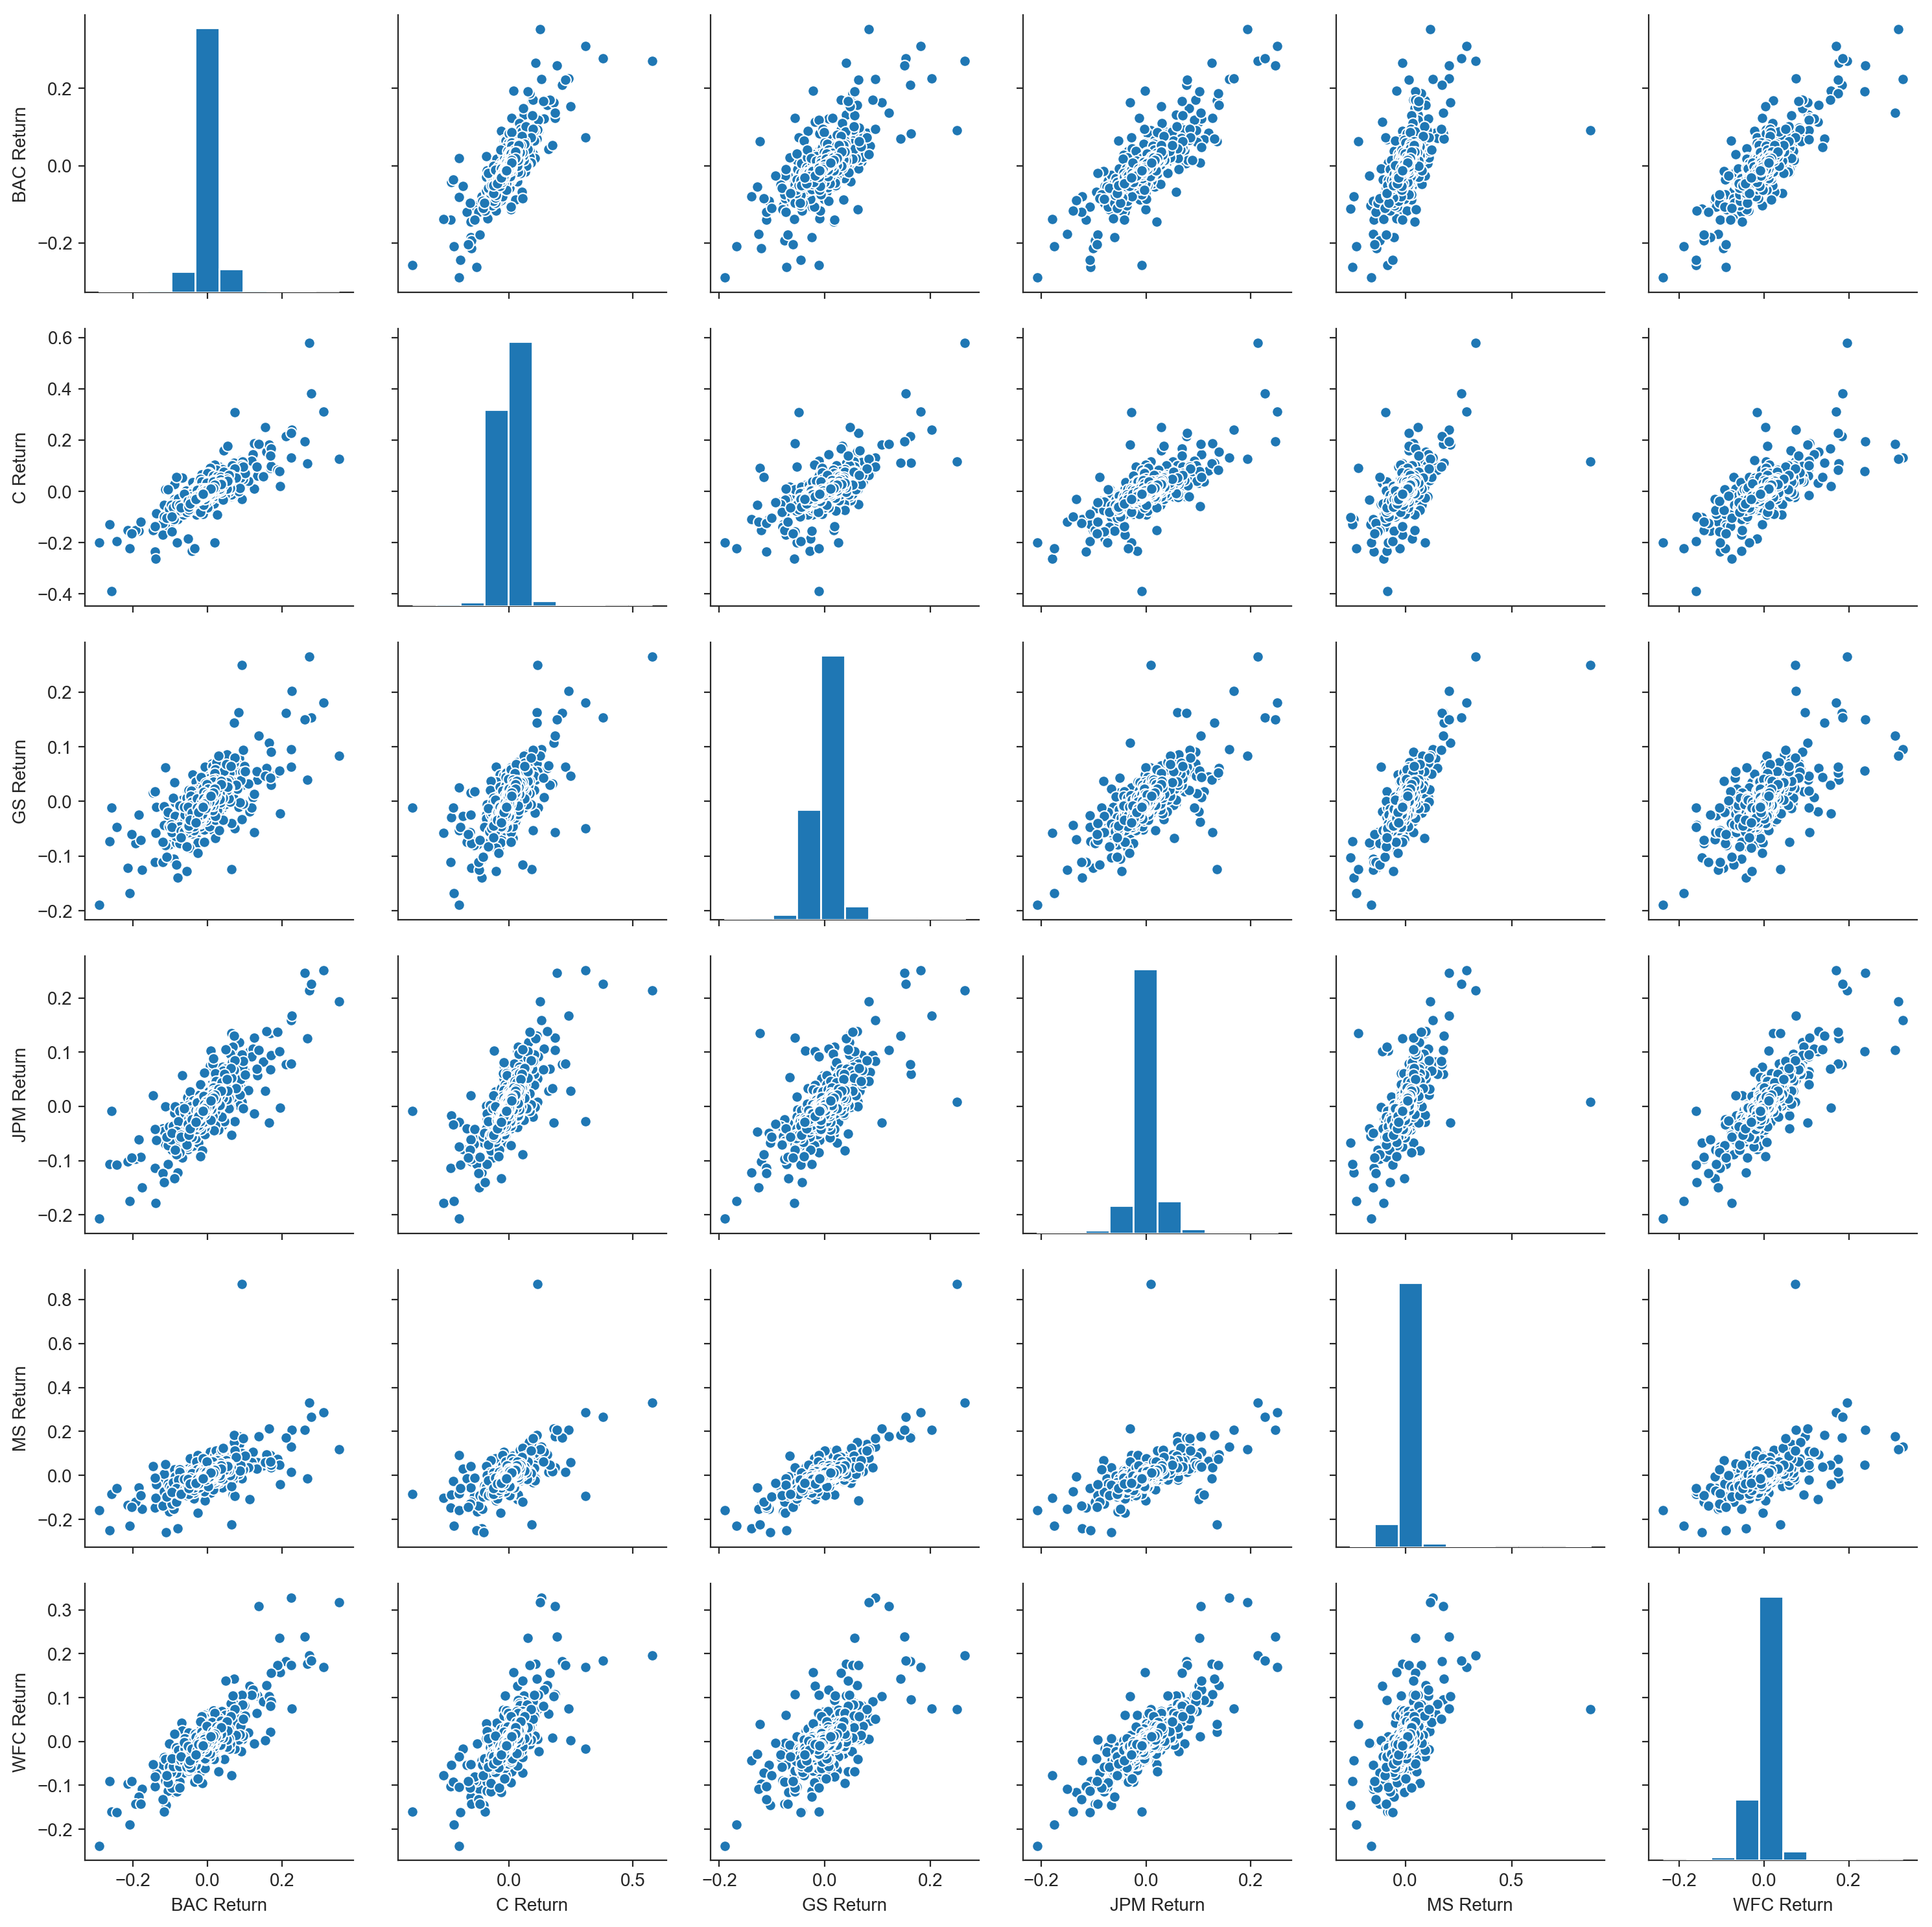

In [151]:
sns.set_style('ticks')
sns.pairplot(returns)
plt.show()

**What dates each bank stock had the best and worst single day returns?**

In [152]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [153]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**Check the standard deviation of the returns, which stock was the riskiest over the entire time period? Which one was the riskiest for the year 2015?**

In [154]:
returns.std()

BAC Return    0.036652
C Return      0.038663
GS Return     0.025381
JPM Return    0.027669
MS Return     0.037710
WFC Return    0.030191
dtype: float64

In [155]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016174
C Return      0.015288
GS Return     0.014043
JPM Return    0.014006
MS Return     0.016287
WFC Return    0.012552
dtype: float64

**Create a distplot of the 2015 returns for Morgan Stanley**

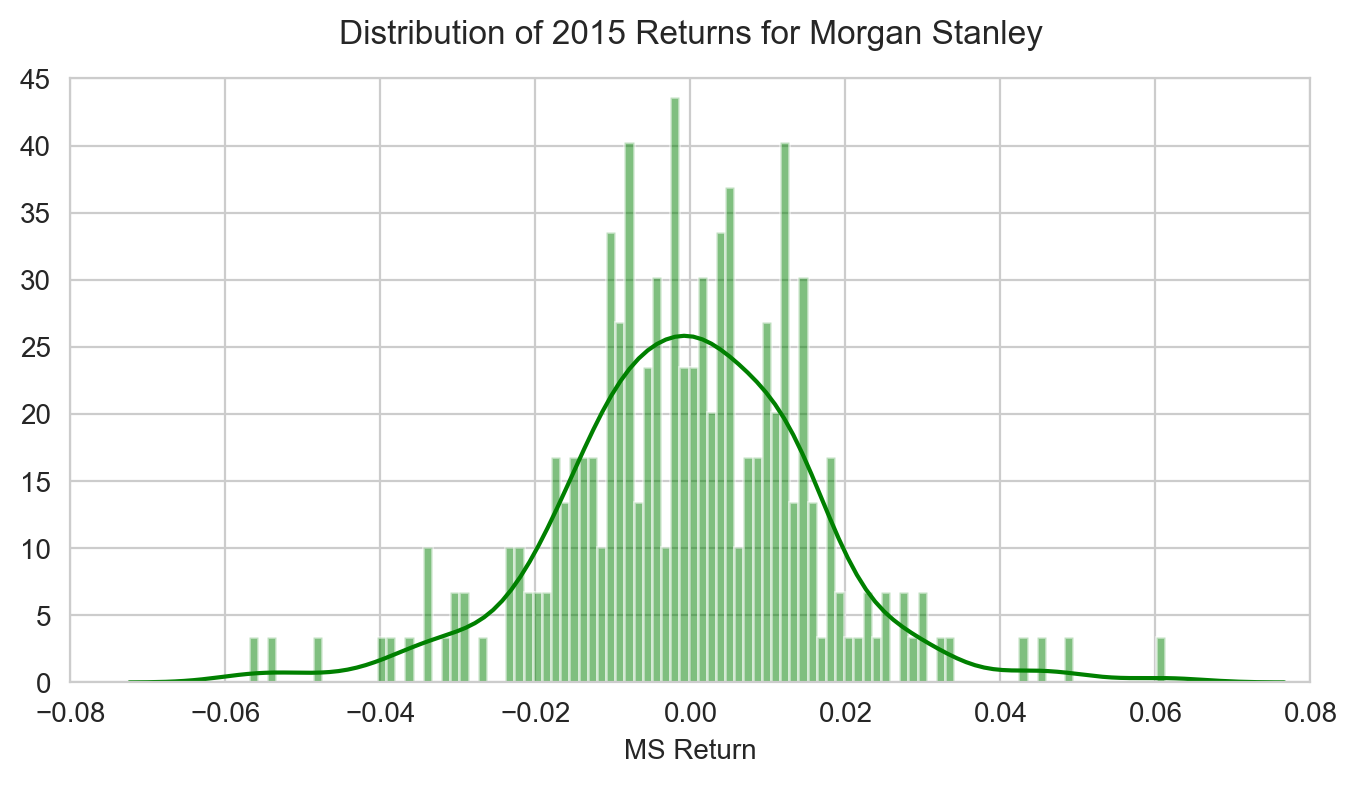

In [156]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], bins=100, color='green',hist_kws={'alpha':0.5})
plt.xlim(-0.08,0.08)
plt.ylim(0,45)
plt.title('Distribution of 2015 Returns for Morgan Stanley',y=1.03)
plt.show()

**Create a distplot of the 2008 returns for CitiGroup**

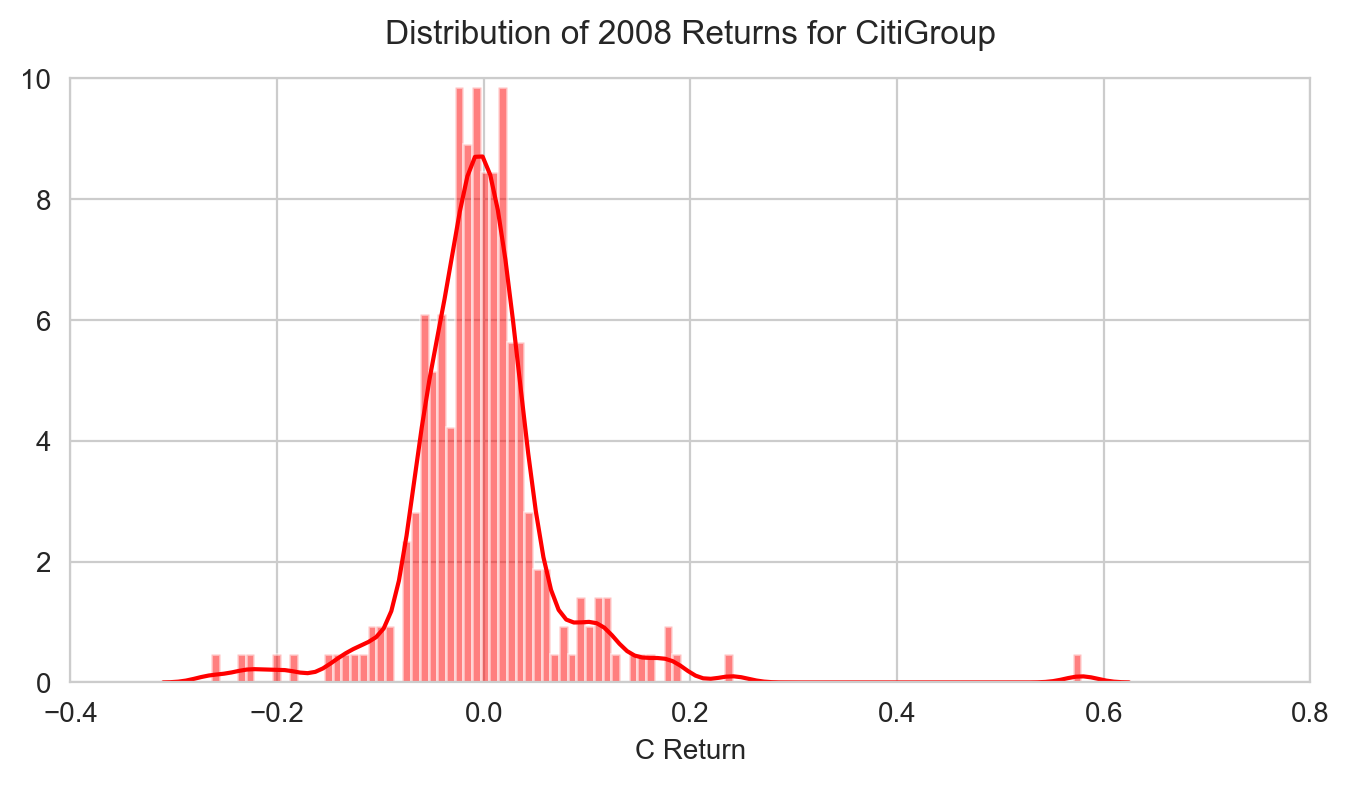

In [157]:
plt.figure(figsize=(8,4))
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], bins=100, color='red',hist_kws={'alpha':0.5})
plt.xlim(-0.4,0.8)
plt.ylim(0,10)
plt.title('Distribution of 2008 Returns for CitiGroup',y=1.03)
plt.show()

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [158]:
import plotly
import plotly.graph_objs as go    
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Adj Close price for each bank for the entire index of time.**

In [159]:
layout = go.Layout(
        title={
        'text': "Adjusted Closing Price for Bank Stocks from 2006 to 2016",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis=dict(
            range=['2006', '2016']
        ),
        yaxis=dict(
            range=[0, 600]
        )
    )
bank_stocks.xs('Adj Close',level=1,axis=1).iplot(layout=layout)

<img src='adj.png' />

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plot the rolling 30 day average against the Adjusted Closing Price for Bank Of America's stock for the year 2008**

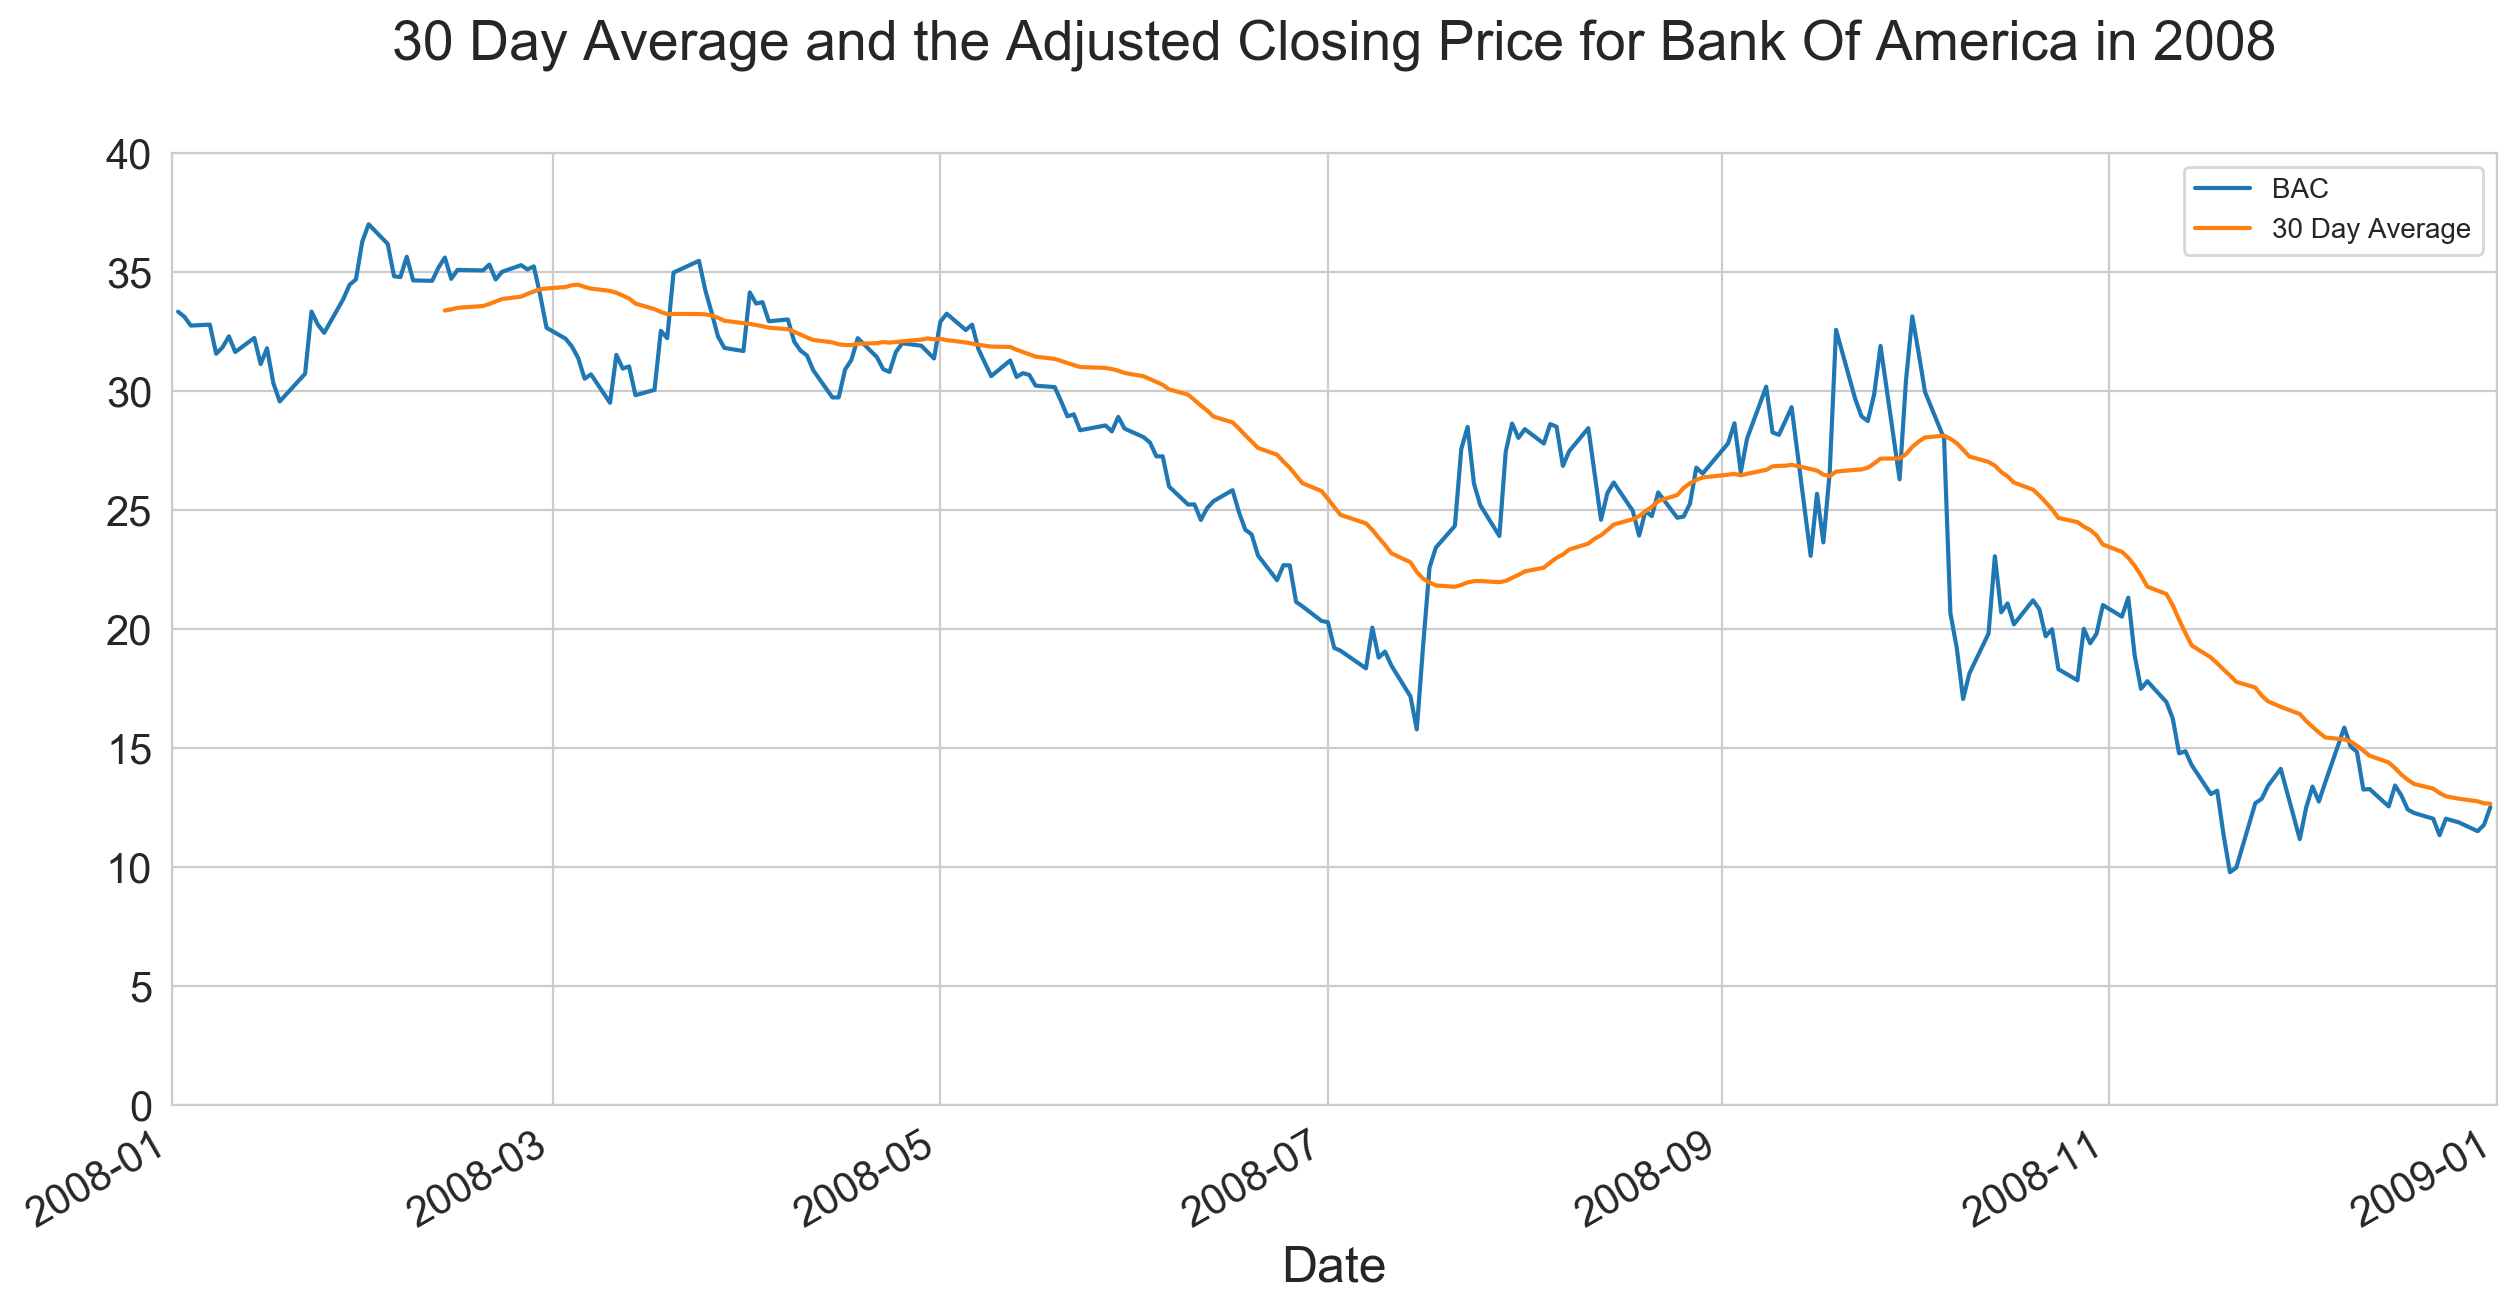

In [160]:
BAC_2008=bank_stocks.xs('Adj Close',level=1,axis=1)['2008-01-01':'2008-12-31'][['BAC']]
BAC_2008['30 Day Average'] = BAC_2008.rolling(window=30).mean()
BAC_2008.columns.names=['']
BAC_2008.plot(kind='line',figsize=(15,7),fontsize=15)

plt.xlim('2008','2009')
plt.ylim(0,40)
plt.title('30 Day Average and the Adjusted Closing Price for Bank Of America in 2008',
         fontdict={'fontsize':20},
         y=1.08)
plt.xlabel('Date', fontsize=18)
plt.show()

**Create a heatmap of the correlation between the stocks Adjusted Closing Price.**

In [161]:
df_adj_close = bank_stocks.xs('Adj Close',axis=1,level=1)

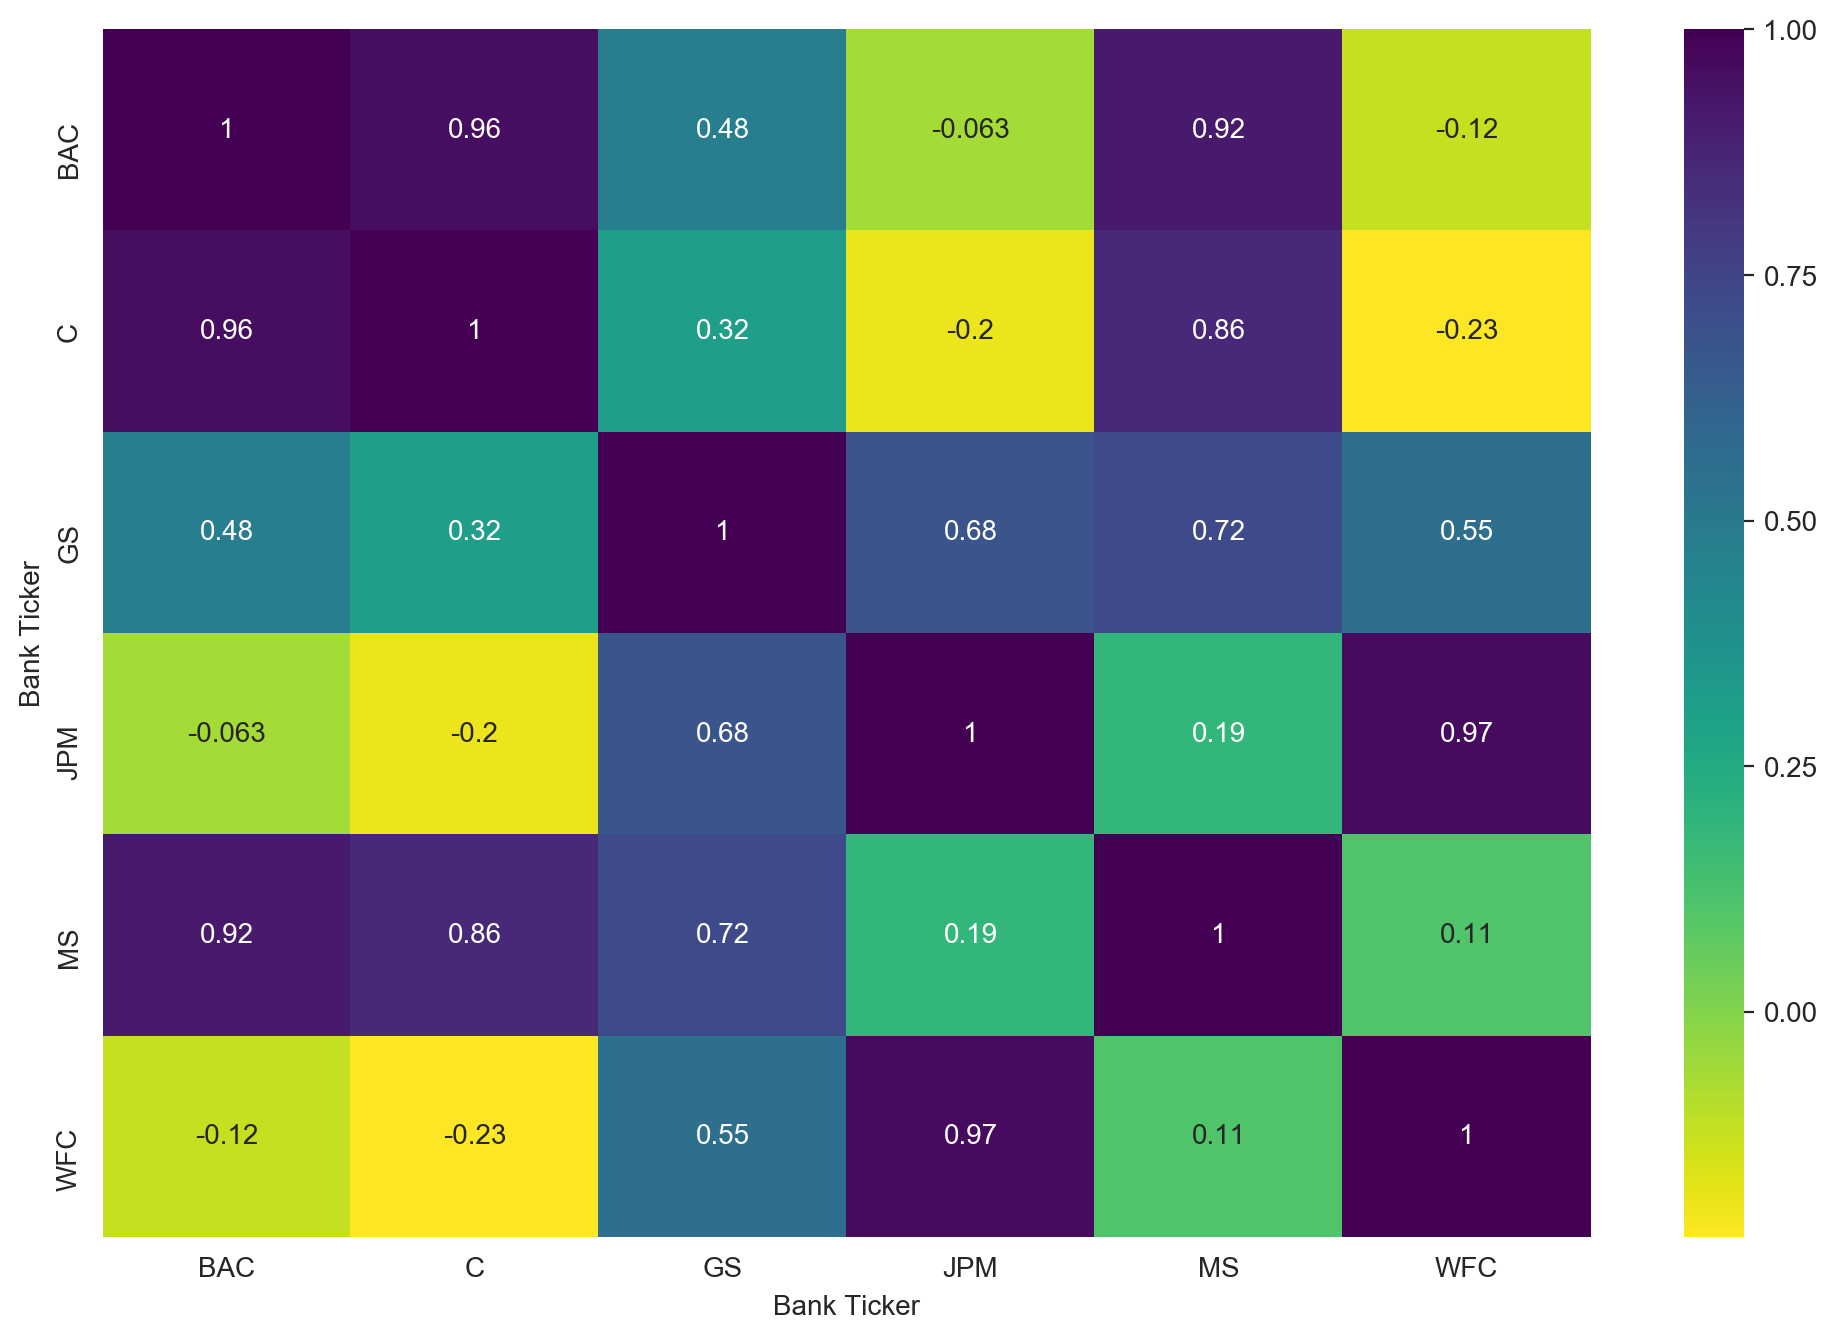

In [162]:
plt.figure(figsize=(12,8))
sns.heatmap(df_adj_close.corr(),cmap='viridis_r',annot=True)
plt.show()

**Create a heatmap of the correlation between the stocks Adjusted Closing Price.**

<Figure size 2400x1600 with 0 Axes>

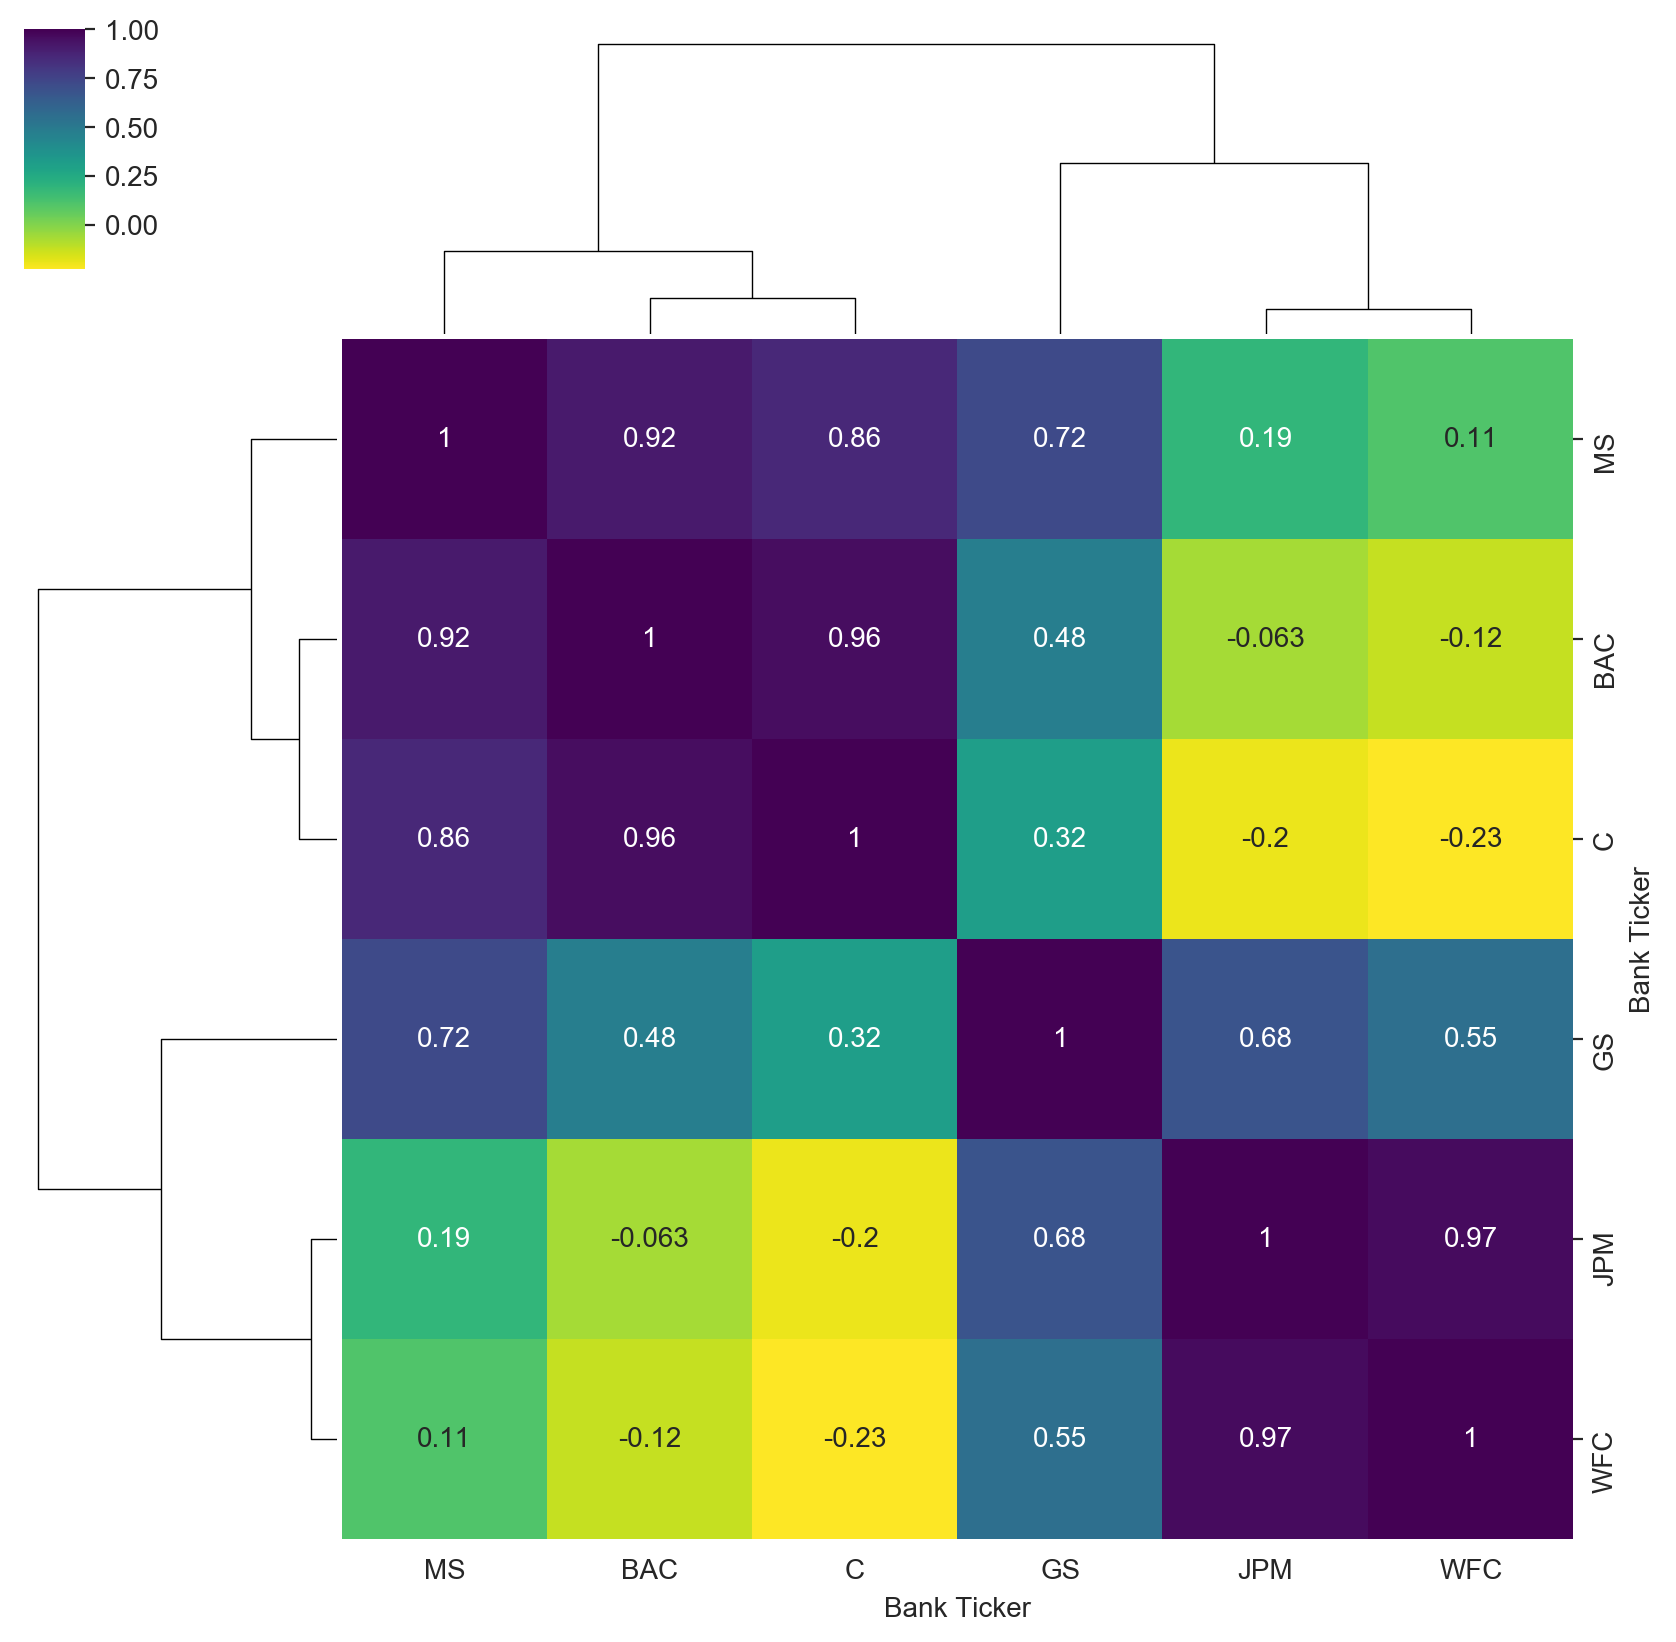

In [163]:
plt.figure(figsize=(12,8))
sns.clustermap(df_adj_close.corr(),cmap='viridis_r',annot=True)
plt.show()

# Technical Analysis plots

In this part of the project I will rely on the cufflinks library to create some Technical Analysis plots. 

**Create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [165]:
BAC['2015-01-01':'2016-01-01'].iplot(kind='candle',
                                     title={"text":"Bank of America's Stock in 2015",
                                            "x":0.5}
                                    )

<img src='bac.png' />

**Create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [166]:
MS['2015-01-01':'2016-01-01']['Adj Close'].ta_plot(study='sma',
                                                   periods=[13,21,55],
                                                   title='Simple Moving Averages of Morgan Stanley Stock in 2015')

<img src='sma.png' />

**Create a Bollinger Band Plot for Bank of America for the year 2015.**

In [167]:
BAC['2015-01-01':'2016-01-01']['Adj Close'].ta_plot(study='boll',title='Bollinger Bands of Bank of America Stock in 2015')

<img src='bb.png' />

# The End